## Assignment No:3
### Group Name: bobypie
### Group members: Nikita Pai and Abhilash Hemaraj



In [5]:
import pandas as pd
import numpy as np

In [6]:
#loading dataset
df = pd.read_table("C:/Users/paini/OneDrive/Desktop/dmdd/assignment 3/movietweetings/movies.dat", sep = "::", 
                   names=['movie_id', 'movie_title', 'genre'])

C:\Users\paini\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
df.head()

,movie_id,movie_title,genre
0,8,Edison Kinetoscopic Record of a Sneeze (1894),Documentary|Short
1,10,La sortie des usines LumiÃ¨re (1895),Documentary|Short
2,12,The Arrival of a Train (1896),Documentary|Short
3,25,The Oxford and Cambridge University Boat Race ...,NaN
4,91,Le manoir du diable (1896),Short|Horror


In [8]:
#creating a new column by expanding the dataframe
new = df["movie_title"].str.split("(", n = 1, expand = True) 

In [9]:
new.head()

,0,1
0,Edison Kinetoscopic Record of a Sneeze,1894)
1,La sortie des usines LumiÃ¨re,1895)
2,The Arrival of a Train,1896)
3,The Oxford and Cambridge University Boat Race,1895)
4,Le manoir du diable,1896)


In [10]:
df["movie_title"] = new[0]

In [11]:
df["movie_year"] = new[1].str.split(")", n = 1, expand = True)[0]

In [12]:
df

,movie_id,movie_title,genre,movie_year
0,8,Edison Kinetoscopic Record of a Sneeze,Documentary|Short,1894
1,10,La sortie des usines LumiÃ¨re,Documentary|Short,1895
2,12,The Arrival of a Train,Documentary|Short,1896
3,25,The Oxford and Cambridge University Boat Race,NaN,1895
4,91,Le manoir du diable,Short|Horror,1896
...,...,...,...,...
34432,10977680,Deon Cole: Cole Hearted,Comedy,2019
34433,10987544,The Forest of Love,Crime,2019
34434,11033952,Square One,Documentary,2019
34435,11064486,Puppy,Drama,2019


In [15]:
#loading ratings dataset
df_ratings = pd.read_table("C:/Users/paini/OneDrive/Desktop/dmdd/assignment 3/movietweetings/ratings.dat", sep = "::", 
                           names=['user_id', 'movie_id', 'rating', 'rating_timestamp'], engine = 'python')

In [14]:
df_ratings.head()

,user_id,movie_id,rating,rating_timestamp
0,1,111161,10,1373234211
1,1,117060,7,1373415231
2,1,120755,6,1373424360
3,1,317919,6,1373495763
4,1,454876,10,1373621125


In [17]:
#loading users dataset
df_users = pd.read_table("C:/Users/paini/OneDrive/Desktop/dmdd/assignment 3/movietweetings/users.dat", sep = "::", 
                           names=['user_id', 'twitter_id'], engine = 'python')

In [18]:
df_users.head()

,user_id,twitter_id
0,1,397291295
1,2,40501255
2,3,417333257
3,4,138805259
4,5,2452094989


In [19]:
#left merge
df_merged = df.merge(df_ratings, on='movie_id', how='left').merge(df_users, on='user_id', how='left')

In [22]:
df_merged.head()

,movie_id,movie_title,genre,movie_year,user_id,rating,rating_timestamp,twitter_id
0,8,Edison Kinetoscopic Record of a Sneeze,Documentary|Short,1894,45154,5,1396981211,611467244
1,10,La sortie des usines LumiÃ¨re,Documentary|Short,1895,54337,10,1412878553,109301105
2,12,The Arrival of a Train,Documentary|Short,1896,43407,10,1439248579,18313363
3,25,The Oxford and Cambridge University Boat Race,NaN,1895,34505,8,1488189899,730732173679071232
4,91,Le manoir du diable,Short|Horror,1896,10455,7,1562928526,297556278


In [24]:
#coverting to csv file
df_merged.to_csv (r'C:/Users/paini/OneDrive/Desktop/dmdd/assignment 3/movietweetings/movie_tweetings.csv', index = False, header=True)

In [16]:
df_merged.isnull().any()

movie_id            False
movie_title         False
genre                True
movie_year          False
user_id             False
rating              False
rating_timestamp    False
twitter_id          False
dtype: bool

In [17]:
df_merged.isnull().sum()

movie_id              0
movie_title           0
genre               437
movie_year            0
user_id               0
rating                0
rating_timestamp      0
twitter_id            0
dtype: int64

In [18]:
import mysql.connector
from mysql.connector import Error

In [19]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd="Bindu@4015695"
)


In [20]:
print(mydb)

In [21]:
mycursor = mydb.cursor()

In [22]:
mycursor.execute("SHOW DATABASES")

In [23]:
for x in mycursor:
  print(x)

('abc',)
('amazon',)
('information_schema',)
('movie_tweetings',)
('mysql',)
('performance_schema',)
('sakila',)
('sys',)
('world',)


In [24]:
max(df_merged.movie_title.apply(len))


109

In [25]:
max(df_merged.genre.map(str).apply(len))

78

In [26]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 815131 entries, 0 to 815130
Data columns (total 8 columns):
movie_id            815131 non-null int64
movie_title         815131 non-null object
genre               814694 non-null object
movie_year          815131 non-null object
user_id             815131 non-null int64
rating              815131 non-null int64
rating_timestamp    815131 non-null int64
twitter_id          815131 non-null int64
dtypes: int64(5), object(3)
memory usage: 56.0+ MB


In [27]:
for x in list(df_merged.columns):
    print(x)
    print((max(df_merged[x].map(str).apply(len))))

movie_id
8
movie_title
109
genre
78
movie_year
4
user_id
5
rating
2
rating_timestamp
10
twitter_id
19


In [28]:
# Movies csv file
df.to_csv (r'C:\Users\abhil\Downloads\movietweetings\movies.csv', index = False, header=True)
df.to_csv (r'C:\ProgramData\MySQL\MySQL Server 8.0\Uploads\movies.csv', index = False, header=True)

In [29]:
# Ratings csv file
df_ratings.to_csv (r'C:\Users\abhil\Downloads\movietweetings\ratings.csv', index = False, header=True)
df.to_csv (r'C:\ProgramData\MySQL\MySQL Server 8.0\Uploads\ratings.csv', index = False, header=True)

In [30]:
# Users csv file
df_users.to_csv(r'C:\Users\abhil\Downloads\movietweetings\users.csv', index = False, header=True)
df.to_csv (r'C:\ProgramData\MySQL\MySQL Server 8.0\Uploads\users.csv', index = False, header=True)

In [31]:
mycursor.execute("SELECT * FROM movie_tweetings.movies")

In [32]:
myresult = mycursor.fetchall()

In [84]:
df_ratings.count

<bound method DataFrame.count of         user_id  movie_id  rating  rating_timestamp
0             1    111161      10        1373234211
1             1    117060       7        1373415231
2             1    120755       6        1373424360
3             1    317919       6        1373495763
4             1    454876      10        1373621125
5             1    790724       8        1374641320
6             1    882977       8        1372898763
7             1   1229238       9        1373506523
8             1   1288558       5        1373154354
9             1   1300854       8        1377165712
10            1   1483013       6        1374727057
11            1   1583421       7        1373515163
12            1   1588173       9        1372821281
13            1   1711425       3        1372604878
14            1   2024432       8        1372703553
15            1   2053463       8        1372799756
16            1   2101341       7        1372770087
17            1   2101441      

In [33]:
df = pd.read_csv("C:/Users/abhil/OneDrive/Desktop/dmdd/ass3/movie_tweetings.csv")

Now that we have converted the database in sql format, we will be using mongo import command to import data to MongoDB

In [34]:
df.head()

,movie_id,movie_title,genre,movie_year,user_id,rating,rating_timestamp,twitter_id
0,8,Edison Kinetoscopic Record of a Sneeze,Documentary|Short,1894,45154,5,1396981211,611467244
1,10,La sortie des usines LumiÃ¨re,Documentary|Short,1895,54337,10,1412878553,109301105
2,12,The Arrival of a Train,Documentary|Short,1896,43407,10,1439248579,18313363
3,25,The Oxford and Cambridge University Boat Race,NaN,1895,34505,8,1488189899,730732173679071232
4,91,Le manoir du diable,Short|Horror,1896,10455,7,1562928526,297556278


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815131 entries, 0 to 815130
Data columns (total 8 columns):
movie_id            815131 non-null int64
movie_title         815131 non-null object
genre               814694 non-null object
movie_year          815131 non-null int64
user_id             815131 non-null int64
rating              815131 non-null int64
rating_timestamp    815131 non-null int64
twitter_id          815131 non-null int64
dtypes: int64(6), object(2)
memory usage: 49.8+ MB


In [37]:
import pymongo
import pprint

In [38]:
connection = pymongo.MongoClient('localhost', 27017)

In [39]:
database = connection['movie']

In [40]:
collection = database['tweets']

In [41]:
from IPython.display import Image

## QUERIES

Now that we have connected Python to MongoDB, we will asking queries and tesing use cases to get a specific  outcome.

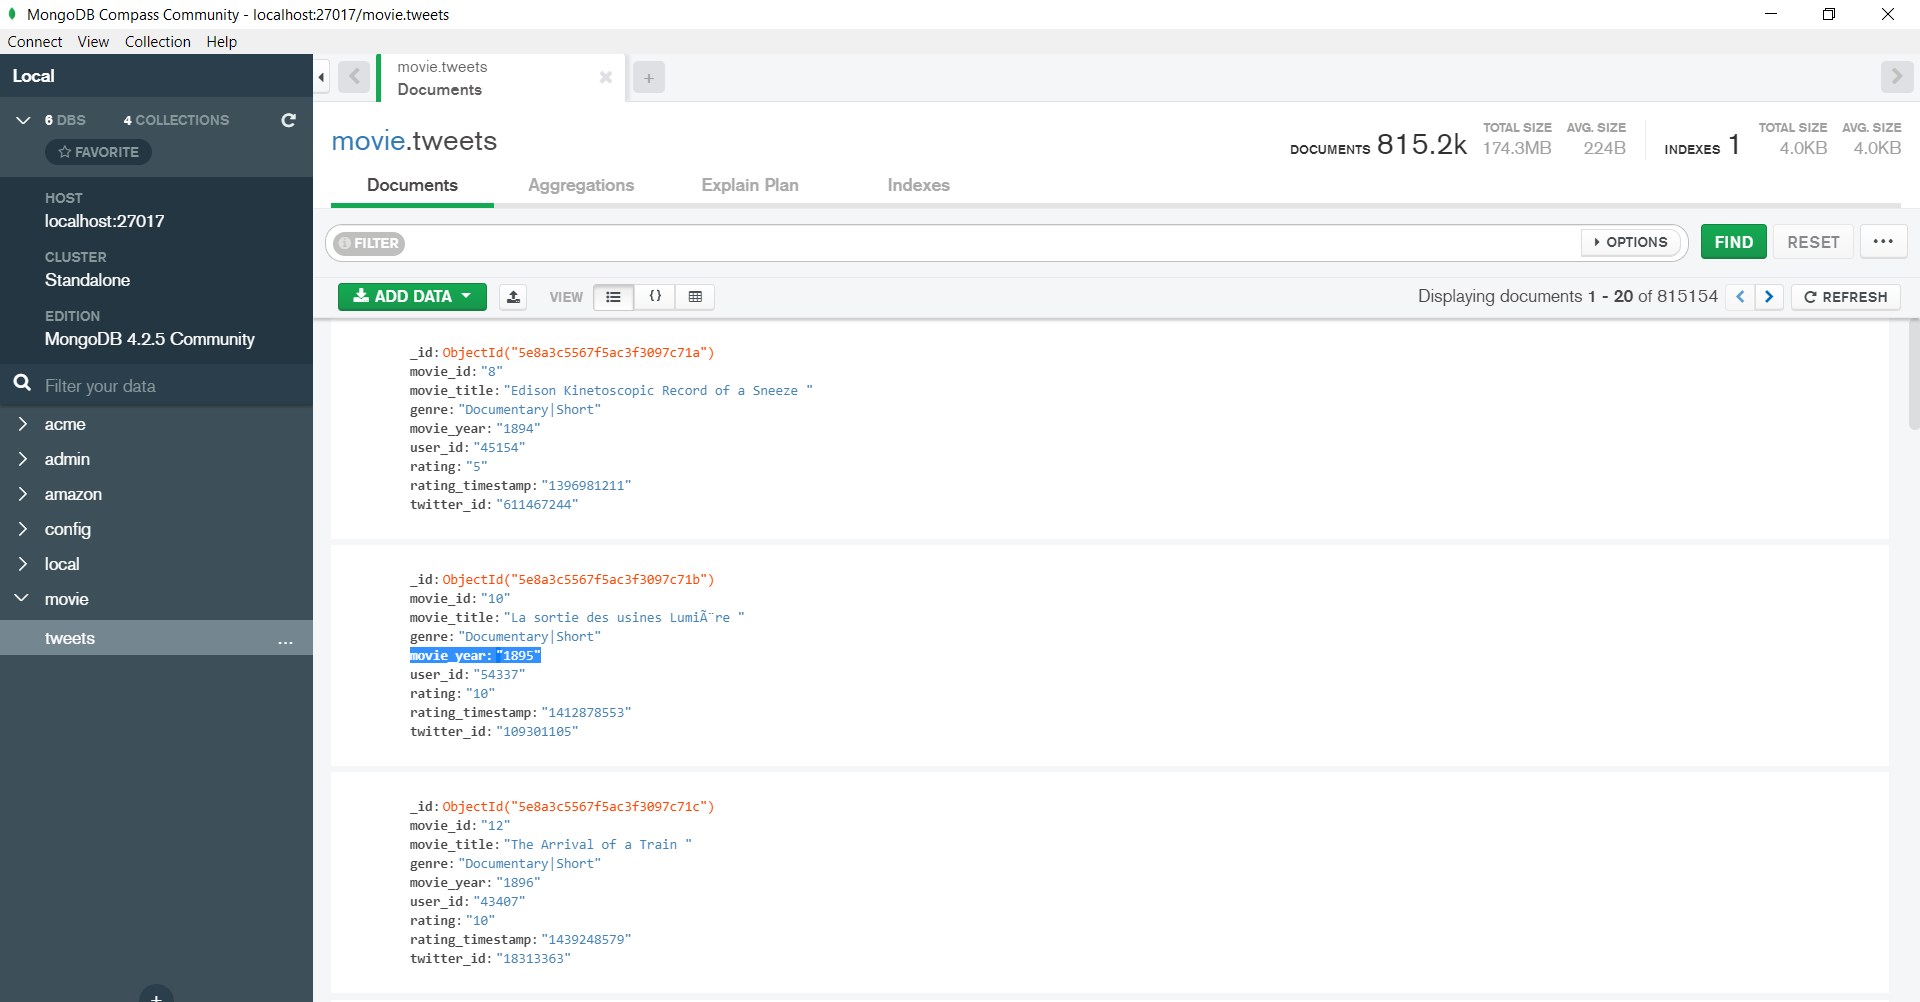

In [42]:
Image(filename = "C:/Users/abhil/OneDrive/Desktop/dmdd/ass3/Capture2.png", width=1200, height=1200)

Implementation of use cases for retrieval of data

In [43]:
pprint.pprint(collection.find_one({'movie_year': '1895'}))

{'_id': ObjectId('5e8d0cac56e12f3ca0300f4b'),
 'genre': 'Documentary|Short',
 'movie_id': '10',
 'movie_title': 'La sortie des usines LumiÃ¨re ',
 'movie_year': '1895',
 'rating': '10',
 'rating_timestamp': '1412878553',
 'twitter_id': '109301105',
 'user_id': '54337'}


In [44]:
pprint.pprint(collection.find_one({'genre': 'Documentary|Short'}))

{'_id': ObjectId('5e8d0cac56e12f3ca0300f4a'),
 'genre': 'Documentary|Short',
 'movie_id': '8',
 'movie_title': 'Edison Kinetoscopic Record of a Sneeze ',
 'movie_year': '1894',
 'rating': '5',
 'rating_timestamp': '1396981211',
 'twitter_id': '611467244',
 'user_id': '45154'}


In [45]:
from pymongo import MongoClient
client = MongoClient()
db = client['movie']


In [46]:
# CREATE ACCOUNTS COLLECTION 
coll = db['tweets']

In [47]:
# CREATE AN INDEX ON THE COLLECTION TO AVOID INSERTION OF DUPLICATES
db.coll.create_index([('rating', pymongo.ASCENDING)], unique=True)

'rating_1'

In [48]:
#SHOW NUMBER OF ACCOUNTS IN TABLE
coll.count()


C:\Users\abhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  


653636

In [69]:


result = coll.find( {'genre': 'Documentary'} )

In [50]:
result

In [51]:
print(result.next())

{'_id': ObjectId('5e8d0cac56e12f3ca0300fbb'), 'movie_id': '10180', 'movie_title': 'Godovshchina revolyutsii ', 'genre': 'Documentary', 'movie_year': '1918', 'user_id': '10869', 'rating': '6', 'rating_timestamp': '1568315217', 'twitter_id': '98589818'}


In [52]:
result.rewind()

In [53]:
print(list(result))

[{'_id': ObjectId('5e8d0cac56e12f3ca0300fbb'), 'movie_id': '10180', 'movie_title': 'Godovshchina revolyutsii ', 'genre': 'Documentary', 'movie_year': '1918', 'user_id': '10869', 'rating': '6', 'rating_timestamp': '1568315217', 'twitter_id': '98589818'}, {'_id': ObjectId('5e8d0cac56e12f3ca0301050'), 'movie_id': '13427', 'movie_title': 'Nanook of the North ', 'genre': 'Documentary', 'movie_year': '1922', 'user_id': '408', 'rating': '10', 'rating_timestamp': '1378658393', 'twitter_id': '435077235'}, {'_id': ObjectId('5e8d0cac56e12f3ca0301051'), 'movie_id': '13427', 'movie_title': 'Nanook of the North ', 'genre': 'Documentary', 'movie_year': '1922', 'user_id': '2819', 'rating': '9', 'rating_timestamp': '1392932133', 'twitter_id': '26558312'}, {'_id': ObjectId('5e8d0cac56e12f3ca0301052'), 'movie_id': '13427', 'movie_title': 'Nanook of the North ', 'genre': 'Documentary', 'movie_year': '1922', 'user_id': '11167', 'rating': '7', 'rating_timestamp': '1419468632', 'twitter_id': '116154122'}, {'

In [71]:
fivestarcount = db.tweets.find({'rating': '10'}).count()
print(fivestarcount)

C:\Users\abhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """Entry point for launching an IPython kernel.


78847


A description of the design choices we made in converting our SQL Schema

In order to convert the Normalized datasets to NoSQL DB, we needed to consolidate the dataset into one.
This meant that merging the datasets using their respective primary keys. And creating a single large dataset. This, in turn, means that we are de-Normalizing the datasets back from 3NF to 1NF. 
The basic data entity of a MongoDB database is a key-value pair and hence it's possible to have null values in the dataset and still create a NoSQL DB.

### What are tags are associated with a person, place or thing?
We use tags as a meta-information to gain information which are not explicitly mentioned. In this case we are sub-grouping comical genre by tagging Comedy as a genre and querying through MongoDB.

In [82]:
myquery = { "genre": "Comedy"}

mydoc = coll.find(myquery)

for x in mydoc:
  print(x)

{'_id': ObjectId('5e8d0cac56e12f3ca0300fb5'), 'movie_id': '9893', 'movie_title': 'Die Austernprinzessin ', 'genre': 'Comedy', 'movie_year': '1919', 'user_id': '26242', 'rating': '10', 'rating_timestamp': '1448743174', 'twitter_id': '787930938'}
{'_id': ObjectId('5e8d0cac56e12f3ca0300fb6'), 'movie_id': '9893', 'movie_title': 'Die Austernprinzessin ', 'genre': 'Comedy', 'movie_year': '1919', 'user_id': '31717', 'rating': '7', 'rating_timestamp': '1449075458', 'twitter_id': '2262633792'}
{'_id': ObjectId('5e8d0cac56e12f3ca03010a1'), 'movie_id': '14538', 'movie_title': 'Three Ages ', 'genre': 'Comedy', 'movie_year': '1923', 'user_id': '25682', 'rating': '9', 'rating_timestamp': '1363153767', 'twitter_id': '87087710'}
{'_id': ObjectId('5e8d0cac56e12f3ca03010a2'), 'movie_id': '14538', 'movie_title': 'Three Ages ', 'genre': 'Comedy', 'movie_year': '1923', 'user_id': '30048', 'rating': '9', 'rating_timestamp': '1395577106', 'twitter_id': '382254493'}
{'_id': ObjectId('5e8d0cac56e12f3ca03010a3'

### What people, places or things(read as movies) are popular in your domain?

In [89]:



myquery = { "rating": {"$gte": "8"}, "movie_year": {"$gte": "2010"}  }

mydoc = coll.find(myquery).limit(50)

for x in mydoc:
  print(x)

{'_id': ObjectId('5e8d0cac56e12f3ca0301060'), 'movie_id': '13442', 'movie_title': '"Nosferatu', 'genre': ' eine Symphonie des Grauens "', 'movie_year': 'Fantasy|Horror', 'user_id': '1922', 'rating': '8924', 'rating_timestamp': '7', 'twitter_id': '1391938600'}
{'_id': ObjectId('5e8d0cac56e12f3ca0301e8a'), 'movie_id': '35140', 'movie_title': '"Now', 'genre': ' Voyager "', 'movie_year': 'Drama|Romance', 'user_id': '1942', 'rating': '9320', 'rating_timestamp': '8', 'twitter_id': '1570575238'}
{'_id': ObjectId('5e8d0cac56e12f3ca0302dd2'), 'movie_id': '46159', 'movie_title': '"Pane', 'genre': ' amore e fantasia "', 'movie_year': 'Comedy|Romance', 'user_id': '1953', 'rating': '8045', 'rating_timestamp': '8', 'twitter_id': '1377438765'}
{'_id': ObjectId('5e8d0cac56e12f3ca0303a33'), 'movie_id': '50490', 'movie_title': '"Heaven Knows', 'genre': ' Mr. Allison "', 'movie_year': 'Adventure|Drama|War', 'user_id': '1957', 'rating': '8661', 'rating_timestamp': '10', 'twitter_id': '1395529893'}
{'_id':

###  What people, places or things are trending in your domain? (A trend is popularity over time.)

In [80]:
myquery = { "rating_timestamp": {"$lte":"1439248579"}, "rating": "10", "movie_year": {"$lt": "2010"}, "movie_id": {"$lte" : "30"}}

mydoc = coll.find(myquery).limit(20)

for x in mydoc:
  print(x)

{'_id': ObjectId('5e8d0cac56e12f3ca0300f4b'), 'movie_id': '10', 'movie_title': 'La sortie des usines LumiÃ¨re ', 'genre': 'Documentary|Short', 'movie_year': '1895', 'user_id': '54337', 'rating': '10', 'rating_timestamp': '1412878553', 'twitter_id': '109301105'}
{'_id': ObjectId('5e8d0cac56e12f3ca0300f4c'), 'movie_id': '12', 'movie_title': 'The Arrival of a Train ', 'genre': 'Documentary|Short', 'movie_year': '1896', 'user_id': '43407', 'rating': '10', 'rating_timestamp': '1439248579', 'twitter_id': '18313363'}
{'_id': ObjectId('5e8d0cac56e12f3ca0300fbf'), 'movie_id': '10323', 'movie_title': 'Das Cabinet des Dr. Caligari ', 'genre': 'Fantasy|Horror|Mystery|Thriller', 'movie_year': '1920', 'user_id': '4773', 'rating': '10', 'rating_timestamp': '1438556898', 'twitter_id': '377497915'}
{'_id': ObjectId('5e8d0cac56e12f3ca0300fc9'), 'movie_id': '10323', 'movie_title': 'Das Cabinet des Dr. Caligari ', 'genre': 'Fantasy|Horror|Mystery|Thriller', 'movie_year': '1920', 'user_id': '25059', 'ratin

### What social media users are like other social media users in your domain?

In [67]:

    
match = {
    'user_id':{"$regex": "Documentary"}
}

group = {
    '_id':"$user_id"
}

ret2 = db.tweets.aggregate([
    {'$match':match},
    {'$group': group},
    {"$sort":{"count":-1}}
])

list(ret2)

[{'_id': 'Documentary'},
 {'_id': 'Documentary|History|News'},
 {'_id': 'Documentary|Biography|News'},
 {'_id': 'Documentary|Comedy|Music'}]

### Conclusion

Hence, a successful transistion from SQL to NoSQL has been created and execution of queries has been implemented as an outcome of the assignment. 

### Contribution

Nikita Pai: 30% Abhilash Hemaraj: 30% External: 15% TA: 5% Professor: 10%

Portfolio(Github Link) https://github.com/Nikita199511 
https://github.com/AbhilashHemaraj/

### Citation



https://www.kaggle.com/tunguz/movietweetings



### License

Copyright 2019 NIKITA PAI & ABHILASH HEMARAJ

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.